### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

### Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
df=pd.read_csv('Telecom_customer_churn.csv') # loading the dataset and storing it into dataframe named df

In [4]:
df.shape

(7043, 21)

Dataset has 7043 rows and 21 columns

In [5]:
df.size

147903

There are 147903 number of elements.

In [6]:
# Printing the first five rows of the dataframe.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Printing the last 5 data points
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [8]:
# Shows the name of all 21 columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
#shows the datatypes of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation: There are three types of datatypes object, integer and float.

In [10]:
#Total charges contain float value but it showing datatype as object, so converting it into float
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 missing values in Total Charges.

In [12]:
#Replacing the missing values with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [13]:
# Shows the unique values present in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
# Summarizing the dataset in statistic format
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


- The average monthly charges is 64.76, 25% of customers are paying more than 89.85 per month
- Count of all columns are equal.
- SeniorCitizen is a catagory columns since it only have 1 and 0
- 75% of customers have tenure less the 55 months and the means of tenure is 32.4 months.

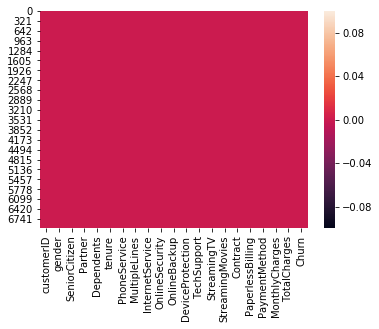

In [15]:
# Checking for any missing valules in dataset
sn.heatmap(df.isnull())

The above heatmap shows that there are no missing values in the dataset.

In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is ,' 0 '.

### Chekcking for dupliacted data

In [17]:
df.duplicated().sum()

0

There are no duplicate entries.

In [18]:
#Dropping the unnecessary columns Customer ID which is of no use.
df.drop("customerID", axis=1,inplace=True)

### Exploratory Data Analysis(EDA)

#### Univariate Analysis

In [19]:
#Target variable Churn
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

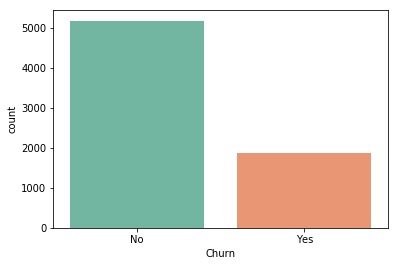

In [20]:
sn.countplot(df['Churn'],palette="Set2")

Count of churn being No is much higher than being yes.

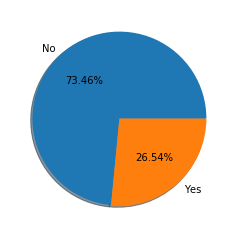

In [21]:
# Pie chart for class variable Loan Status
labels='No','Yes'
fig,ax=plt.subplots()
ax.pie(df['Churn'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

73.5 % of the customers do not churn while 26.5% churn rate is yes.We can clearly see that there is class imbalanced issue,will need to handle before model building.

In [22]:
#Gender column
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Gender')

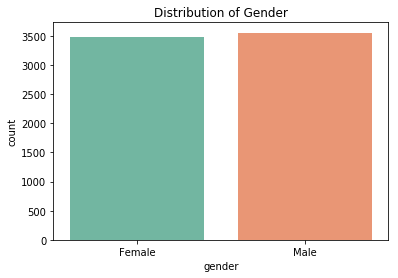

In [23]:
sn.countplot(df['gender'],palette="Set2")
plt.title("Distribution of Gender")

In [24]:
#SeniorCitizen
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Text(0.5, 1.0, 'Distribution of Senior Citizen')

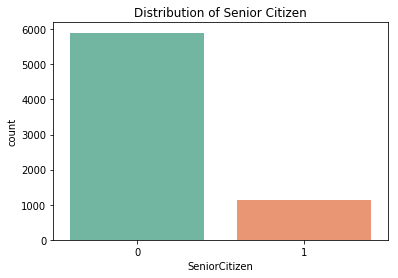

In [25]:
sn.countplot(df['SeniorCitizen'],palette="Set2")
plt.title("Distribution of Senior Citizen")

In [26]:
#Partner
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

Text(0.5, 1.0, 'Distribution of Partner')

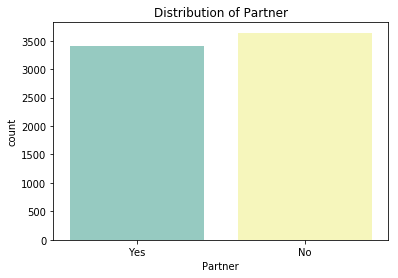

In [27]:
sn.countplot(df['Partner'],palette="Set3")
plt.title("Distribution of Partner")

### Remarks:
- There is equal distribution in Gender and Partner feature.
-  Most of the customers are not senior citizen only 16% approx are senior citizen.

In [28]:
#Dependents
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

Text(0.5, 1.0, 'Distribution of Dependents')

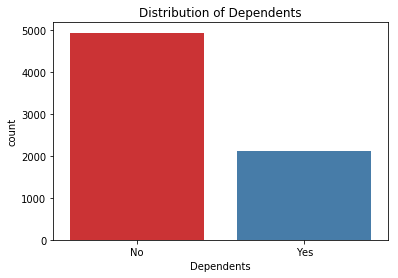

In [29]:
sn.countplot(df['Dependents'],palette="Set1")
plt.title("Distribution of Dependents")

70% of our customers are enconomic independents and 30% of our customers are enconomic dependent.

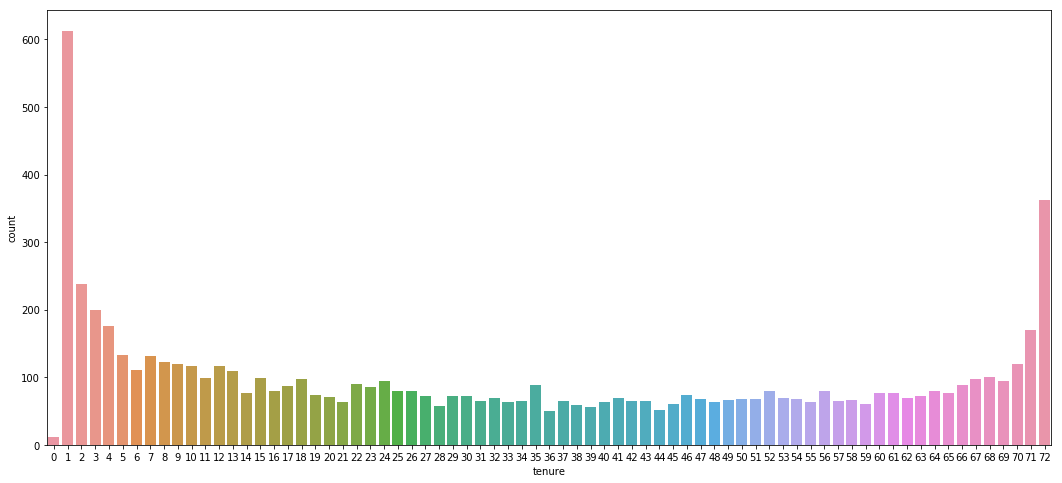

In [30]:
#Tenure
f, axes = plt.subplots(figsize=(18, 8))
sn.countplot(df["tenure"])

The customer with 1 year of tenure and 72 year of tenure are highest among all other tenure. 

In [31]:
#Phone Service
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Text(0.5, 1.0, 'Distribution of Phone Service')

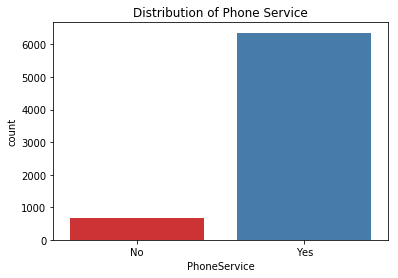

In [32]:
sn.countplot(df['PhoneService'],palette="Set1")
plt.title("Distribution of Phone Service")

In [33]:
#Multiple Lines
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Text(0.5, 1.0, 'Distribution of Multiple Lines')

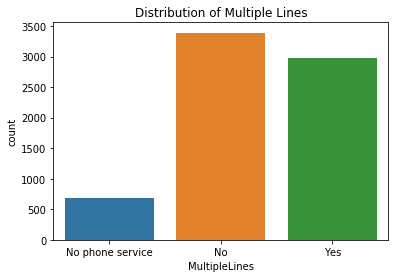

In [34]:
sn.countplot(df['MultipleLines'],palette=None)
plt.title("Distribution of Multiple Lines")

#### Observation

- Most of our customers have used our phone services.
- Among the customers who use phone service, around 50% have multiple lines.

In [35]:
#Internet Service
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Text(0.5, 1.0, 'Distribution of Internet Service')

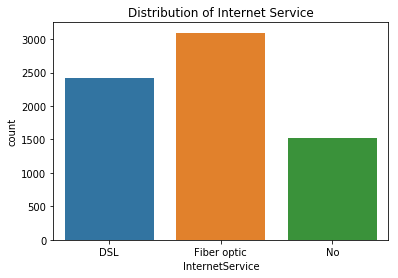

In [36]:
sn.countplot(df['InternetService'],palette=None)
plt.title("Distribution of Internet Service")

In [37]:
#Online Security
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Text(0.5, 1.0, 'Distribution of Online Security')

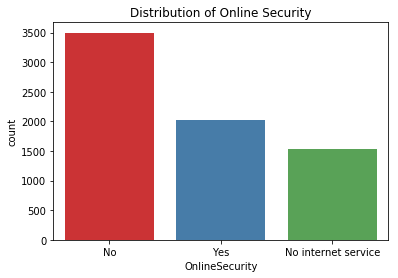

In [38]:
sn.countplot(df['OnlineSecurity'],palette='Set1')
plt.title("Distribution of Online Security")

In [39]:
# Online Backup
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

Text(0.5, 1.0, 'Distribution of Online Backup')

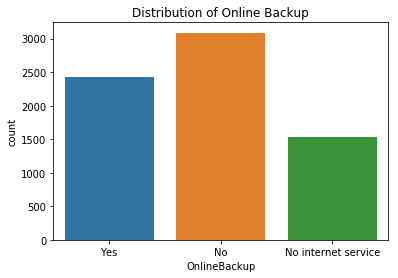

In [40]:
sn.countplot(df['OnlineBackup'],palette=None)
plt.title("Distribution of Online Backup")

#### Observations

 - Many of the customers have opted for the fiber optic internet service.
 - Online security is not provided for around 50% of customers.
 - Online Backup facility is opted as no by 44% of the customers.

In [41]:
#Device Protection
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

Text(0.5, 1.0, 'Distribution of Device Protection')

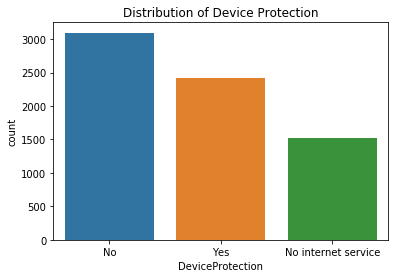

In [42]:
sn.countplot(df['DeviceProtection'],palette=None)
plt.title("Distribution of Device Protection")

Majority of customers opted as no for device protection.

In [43]:
#Tech Support
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

Text(0.5, 1.0, 'Distribution of Tech Support')

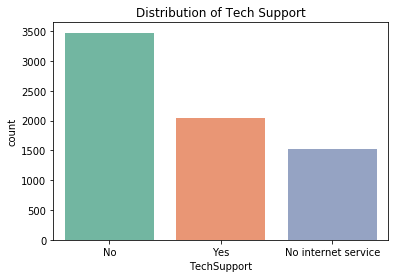

In [44]:
sn.countplot(df['TechSupport'],palette='Set2')
plt.title("Distribution of Tech Support")

Around 1/2 of the customers has no technical support service.

In [45]:
#Straming Tv
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

Text(0.5, 1.0, 'Distribution of Streaming TV')

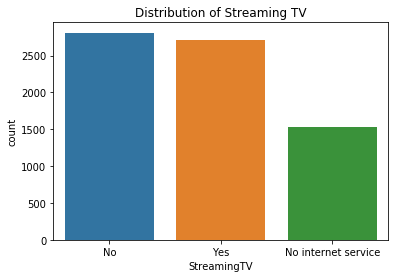

In [46]:
sn.countplot(df['StreamingTV'],palette=None)
plt.title("Distribution of Streaming TV")

In [47]:
#Streaming Movies
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Text(0.5, 1.0, 'Distribution of Streaming Movies')

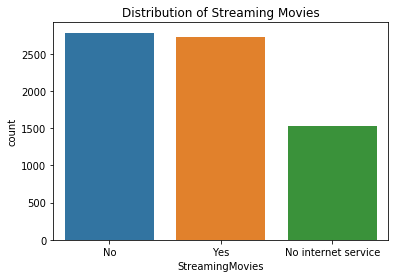

In [48]:
sn.countplot(df['StreamingMovies'],palette=None)
plt.title("Distribution of Streaming Movies")

#### Observation

- It can be seen that number of people who opted and who didn't for streaming TV and Streaming Movies are in almost equal distribution.

In [49]:
#Contract 
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Distribution of Contract')

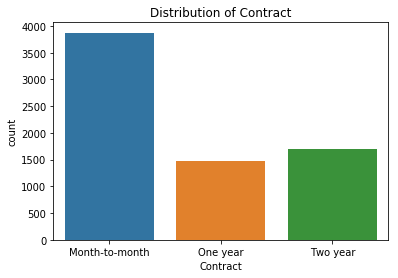

In [50]:
sn.countplot(df['Contract'],palette=None)
plt.title("Distribution of Contract")

In [51]:
#Paperless Billing
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Text(0.5, 1.0, 'Distribution of Paperless Billing')

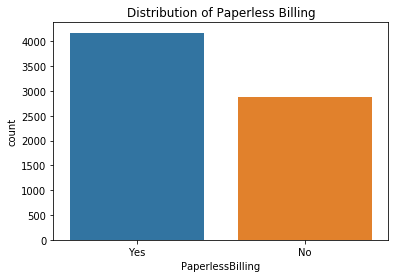

In [52]:
sn.countplot(df['PaperlessBilling'],palette=None)
plt.title("Distribution of Paperless Billing")

In [53]:
#Payment Method
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Text(0.5, 1.0, 'Distribution of Payment Method')

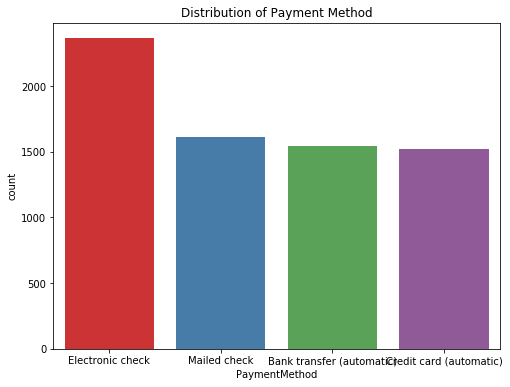

In [54]:
plt.figure(figsize=(8,6))
sn.countplot(df['PaymentMethod'],palette='Set1')
plt.title("Distribution of Payment Method")

#### Observations

- Around half of our customers signed month-to-month contract with us.
-  Around 2/3 rd of customer are going with paperless billing.
- More customers are going to pay with electronic check.

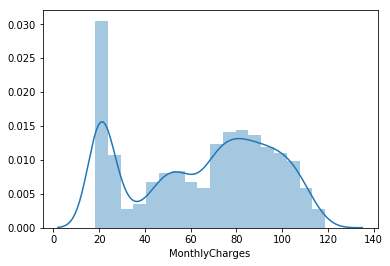

In [55]:
#Monthly Charges
sn.distplot(df['MonthlyCharges'])

Data is not normally distributed above graph shows that data is skewed.

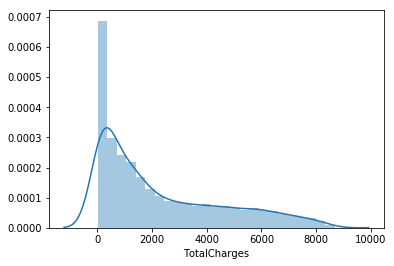

In [56]:
#Total Charges
sn.distplot(df['TotalCharges'])

Total charges are showing that data is highly skewed to the right.

#### Bivariate Anaylsis

Text(0.5, 1.0, 'Churn Rate based on Gender')

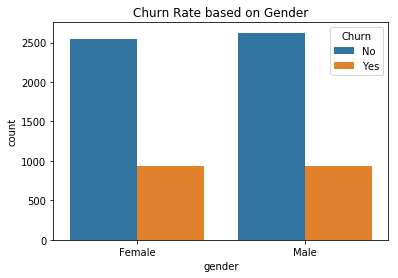

In [57]:
#Count of Churn rate based on Gender.
sn.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate based on Gender')

Text(0.5, 1.0, 'Churn Rate based on SeniorCitizen')

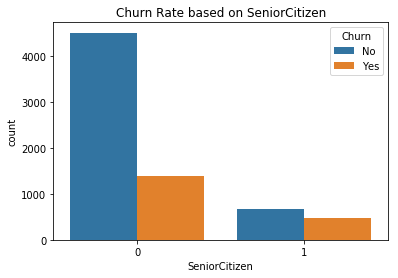

In [58]:
#Count of Churn rate based on SeniorCititzen.
sn.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn Rate based on SeniorCitizen')

Text(0.5, 1.0, 'Churn Rate based on Partner')

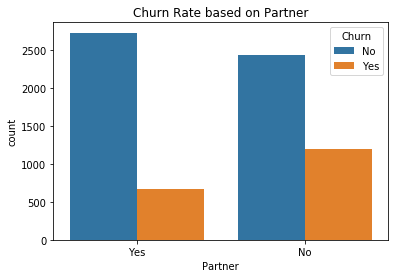

In [59]:
#Count of Churn rate based on Partner.
sn.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn Rate based on Partner')

Text(0.5, 1.0, 'Churn Rate based on Dependents')

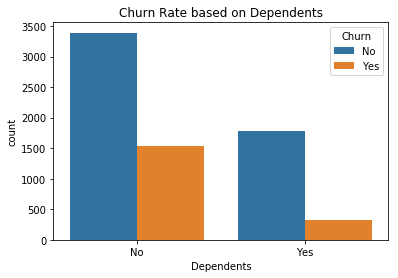

In [60]:
#Count of Churn rate based on Dependents.
sn.countplot(x='Dependents', hue='Churn', data=df)
plt.title('Churn Rate based on Dependents')

#### Observations

- If the customer is a Senior Citizen, seems to have a higher churn ratio,
- If the customer does not have partner, seems like having higher probrobility leave to leave the company, the same case shows on dependents. Maybe for this part of customer, stable is not their first thing to consider.

Text(0.5, 1.0, 'Churn Rate based on Contracts')

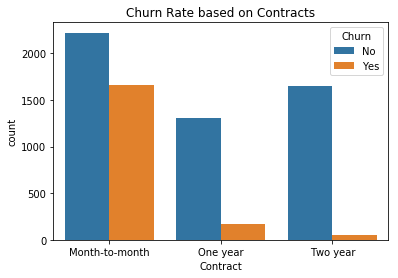

In [61]:
#Count of Churn rate based on Cotracts.
sn.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate based on Contracts')

Text(0.5, 1.0, 'Churn Rate based on Paperless Billing')

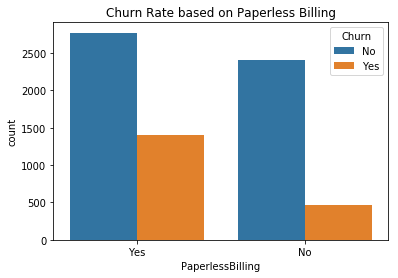

In [62]:
#Count of Churn rate based on Paperless Billings.
sn.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn Rate based on Paperless Billing')

Text(0.5, 1.0, 'Churn Rate based on Payment Method')

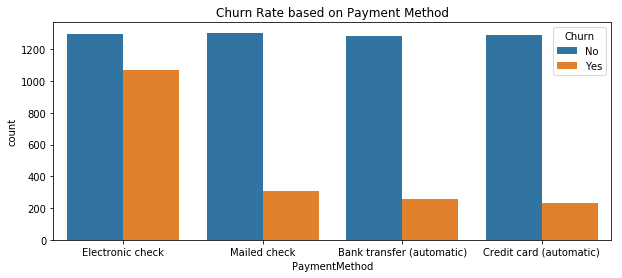

In [63]:
#Count of Churn rate based on Payment Method.
plt.figure(figsize=(10,4))
sn.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn Rate based on Payment Method')

#### Observations

- Customers who pay with electronic check also are more likely to leave, while when it comes to a compare with other payment types, electronic check is more common, we have to go deeper to check is there a relationship between them.
- Customers with short-term contract are more likely to churn and customer having contract for 2 years are least likely to leave.

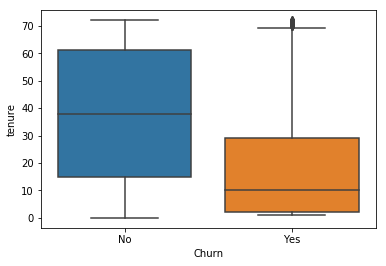

In [64]:
sn.boxplot(x = 'Churn', y = 'tenure',data=df)

We have already witnessed that, longer over 70 months customers are loyal to do not churn.

Text(0.5, 1.0, 'Churn Rate based on Phone Service')

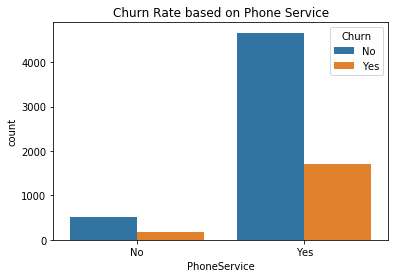

In [65]:
#Count of Churn rate based on Phone Service.
sn.countplot(x='PhoneService', hue='Churn', data=df)
plt.title('Churn Rate based on Phone Service')

Text(0.5, 1.0, 'Churn Rate based on Multiple Lines')

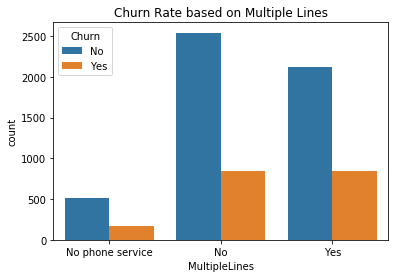

In [66]:
#Count of Churn rate based on MultipleLines.
sn.countplot(x='MultipleLines', hue='Churn', data=df)
plt.title('Churn Rate based on Multiple Lines')

Text(0.5, 1.0, 'Churn Rate based on Internet Service')

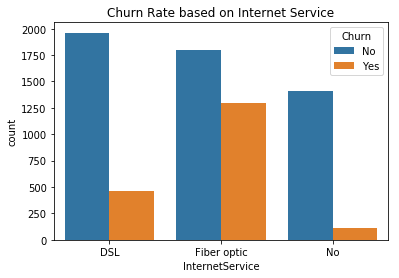

In [67]:
#Count of Churn rate based on Internet Service.
sn.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate based on Internet Service')

#### Observations

- Customers who uses fiber optic internet service are much likely to churn 
- Customer with no phone service are least likely to churn.

Text(0.5, 1.0, 'Churn Rate based on Online Security')

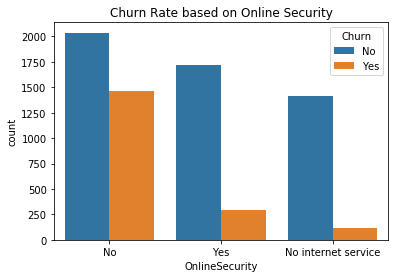

In [68]:
#Count of Churn rate based on Online Security.
sn.countplot(x='OnlineSecurity', hue='Churn', data=df)
plt.title('Churn Rate based on Online Security')

Text(0.5, 1.0, 'Churn Rate based on OnlineBackup')

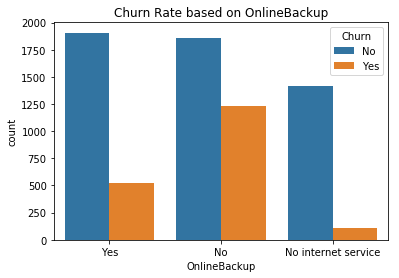

In [69]:
#Count of Churn rate based on Online Backup.
sn.countplot(x='OnlineBackup', hue='Churn', data=df)
plt.title('Churn Rate based on OnlineBackup')

Text(0.5, 1.0, 'Churn Rate based on Device Protection')

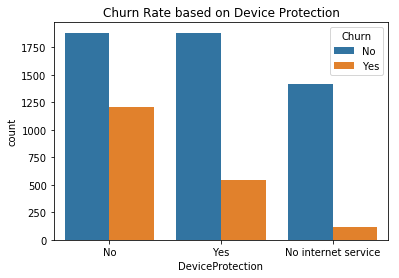

In [70]:
#Count of Churn rate based on Device Protection.
sn.countplot(x='DeviceProtection', hue='Churn', data=df)
plt.title('Churn Rate based on Device Protection')

Text(0.5, 1.0, 'Churn Rate based on Tech Support')

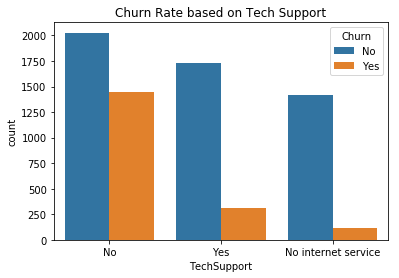

In [71]:
#Count of Churn rate based on Tech Support.
sn.countplot(x='TechSupport', hue='Churn', data=df)
plt.title('Churn Rate based on Tech Support')

#### Observations

- Customers with Tech support service are least likely to churn whereas, in case of no tech support more chances of leaving the company.
- In case Device Protection and Online Backup, Wheather it is provided or not churn rate seeem to be same.
- Customers not having online security as their service  has higher churn rate .

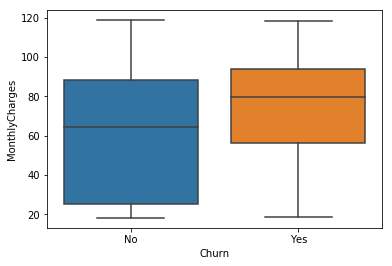

In [72]:
sn.boxplot(x="Churn", y="MonthlyCharges", data=df)

There are not outliers in the data, In an general way we can say that the customers having monthly charges less than 60$ are least likely to leave.

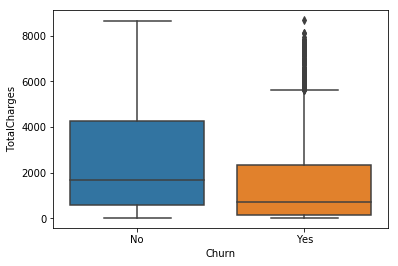

In [73]:
sn.boxplot(x="Churn", y="TotalCharges", data=df)

We can see some outliers in the data for custmers who left the company.

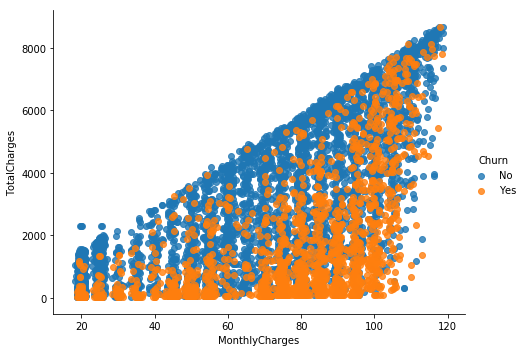

In [74]:
sn.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=df,fit_reg = False,hue = "Churn",aspect=12/9)

As monthly charges increase total charges also increase they shows strogn positively correlation.

### Encoding the Variables

In [75]:
# Shows all categorical variables
df.select_dtypes(['object']).head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [76]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Multivariate analysis

In [77]:
# finding correlation coefficient
cor=df.corr()

In [78]:
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


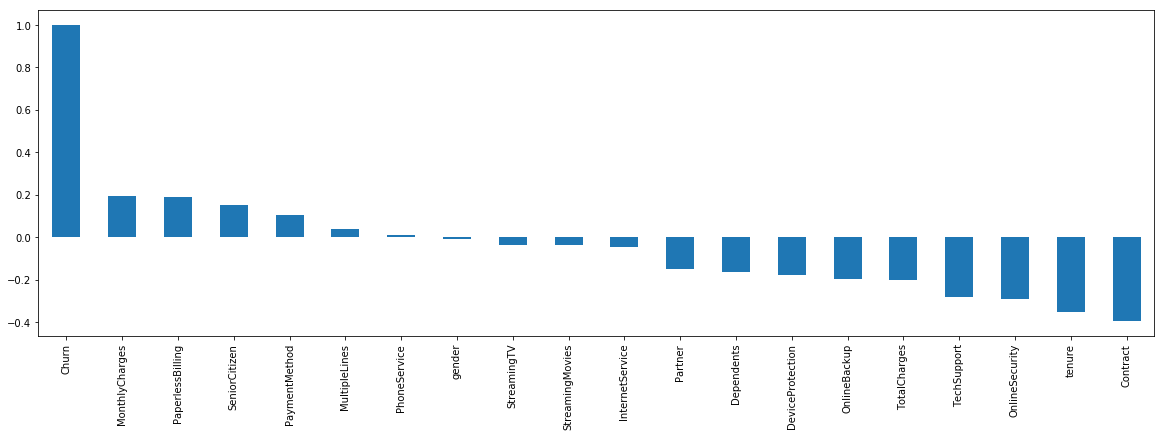

In [79]:
plt.figure(figsize=(20,6))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

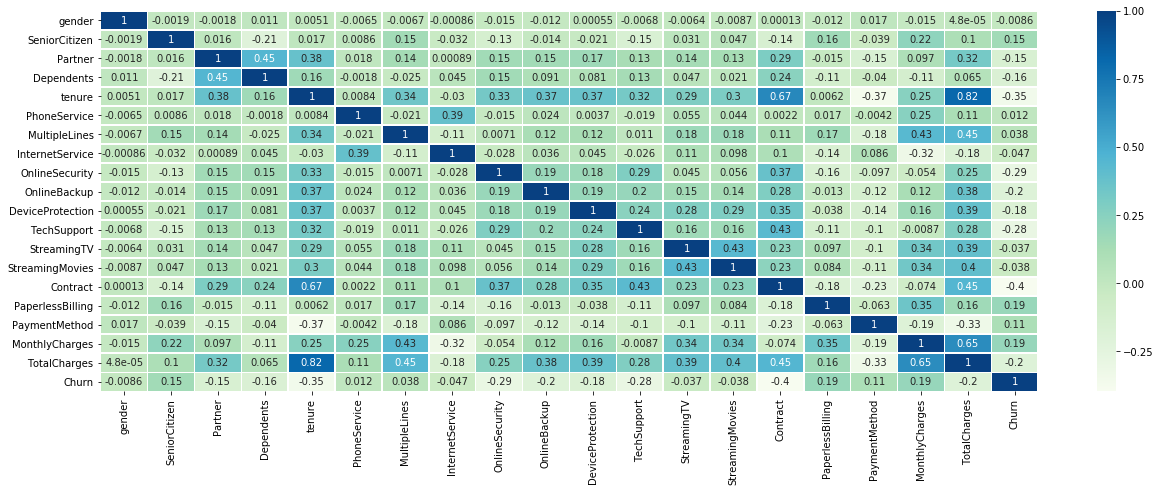

In [80]:
# Plotting heatmap
fig, axis = plt.subplots(figsize=(21, 7))
sn.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

- Tenure is strongly correlated with Totalcharges and Contract. 
- Tenure column is almost have positive correlation with all the columns.
- Total Charges and Monthly charges are positively correlation value of(0.65).

### Removing the outliers

In [81]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [82]:
df.shape

(7043, 20)

In [83]:
new_df.shape

(6361, 20)

In [84]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

9.683373562402386

After removing the outliers from the data the shape of the data has change from (7043,20) to (6361,20) which shows that with the z score method we are able to remove various rows with lossing about 9.68 percent of data , Hence our new data shape is (6361,20).

### Checking for Skewness

In [85]:
new_df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.899649
Churn               1.053055
dtype: float64

Normal skewness range is -0.5 to 0.5 
Total Charges is having value of 0.89

In [86]:
#Applying log transformation technique.
new_df['TotalCharges'] =np.log1p(new_df['TotalCharges'])

In [87]:
new_df.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.746749
Churn               1.053055
dtype: float64

In [88]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0


### Splitting dataset into independent and dependent variables.

In [89]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['Churn'], axis = 1)
y=new_df["Churn"]

In [90]:
print(x.shape)
x.head()

(6361, 19)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,7.544597
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.692723
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.028148
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6.711132
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,7.575790


In [91]:
print(y.shape)
y.head()

(6361,)


1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int32

### Handling Class Imbalanced problem by oversampling the minority class

In [92]:
from imblearn.over_sampling import SMOTE
SM =SMOTE()
x_over, y_over = SM.fit_resample(x, y)

In [93]:
y_over.value_counts()

1    4662
0    4662
Name: Churn, dtype: int64

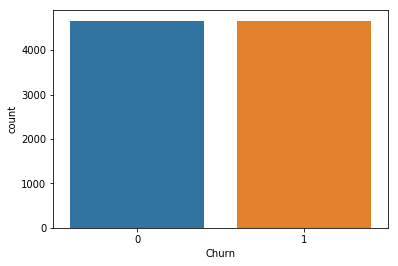

In [94]:
sn.countplot(y_over)

Now the each class is having same number of '0' and '1'

### Applying Standard Scaler method

In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### Finding the best random state

In [97]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.812723373838456 on random state 122


### Create a train test split

In [98]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=maxRS)

### Applying different models on the Dataset

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

####  Logistic Regression

Accuracy score using logistic regression model is 81.27233738384561
Cross validation score 80.61615952017472
-----------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1404
           1       0.80      0.84      0.82      1394

    accuracy                           0.81      2798
   macro avg       0.81      0.81      0.81      2798
weighted avg       0.81      0.81      0.81      2798

-----------------------------

 Confusion Matrix


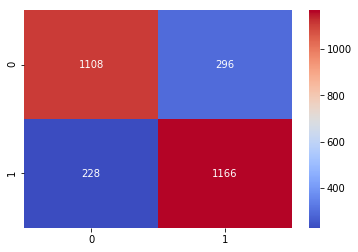

In [111]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

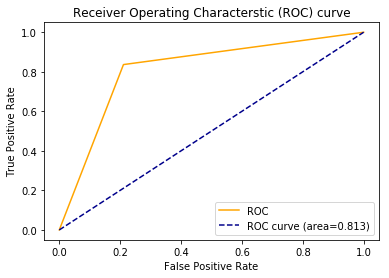

In [105]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% lr_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree Classifier

Accuracy of Decision Tree classification is  80.02144388849179
F1 Score is  80.07130124777183
Cross validation score 73.71478012124086
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1404
           1       0.80      0.81      0.80      1394

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798


 Confusion Matrix


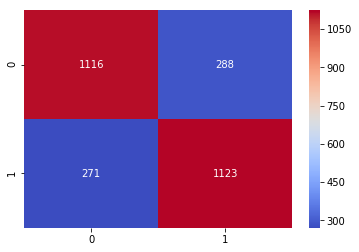

In [112]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_f1=f1_score(y_test,pred)
print("F1 Score is ",dtc_f1*100)
dtc_cv=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",dtc_cv*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

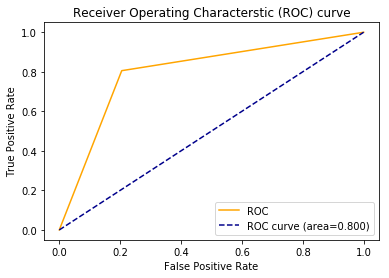

In [113]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% dtc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Gaussian NB classifier

Accuracy score using GuassianNB classifier model is 79.55682630450322
F1 Score is  80.1250868658791
Cross validation score 75.9000182800002
-------------------------------
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1404
           1       0.78      0.83      0.80      1394

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798

-------------------------------

 Confusion Matrix


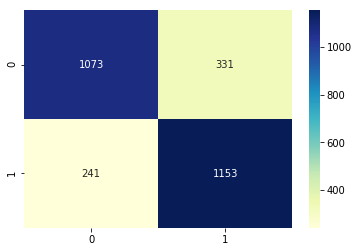

In [114]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
gnb_f1=f1_score(y_test,pred)
print("F1 Score is ",gnb_f1*100)
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

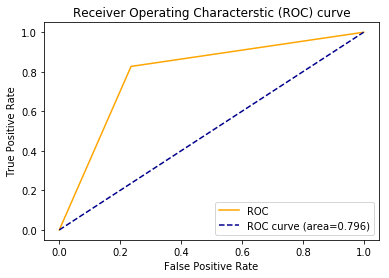

In [115]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% gnb_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

Accuracy of Random Forest Classificarion is  84.16726233023589
Cross validation score 78.16379868285188
F1 Score is  83.69525211630476
-------------------------------
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1404
           1       0.86      0.82      0.84      1394

    accuracy                           0.84      2798
   macro avg       0.84      0.84      0.84      2798
weighted avg       0.84      0.84      0.84      2798

-------------------------------

 Confusion Matrix


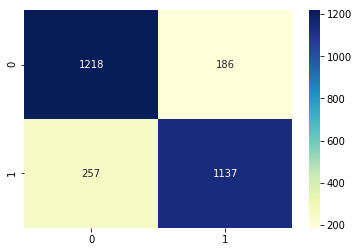

In [149]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=10) # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
rfc_f1=f1_score(y_test,pred)
print("F1 Score is ",rfc_f1*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

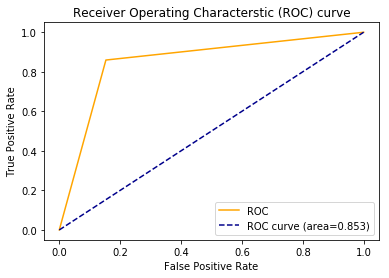

In [117]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% rfc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Classifier

Accuracy of Support Vector Classification is  76.51894210150107
F1 Score is  77.39938080495355
Cross validation score 80.12887400139321
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1404
           1       0.74      0.81      0.77      1394

    accuracy                           0.77      2798
   macro avg       0.77      0.77      0.76      2798
weighted avg       0.77      0.77      0.76      2798


 Confusion Matrix


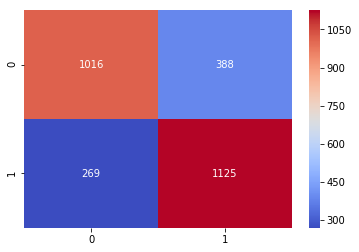

In [118]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
CV2=cross_val_score(svc,x,y,cv=5).mean()
svc_f1=f1_score(y_test,pred)
print("F1 Score is ",svc_f1*100)
print("Cross validation score",CV2*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

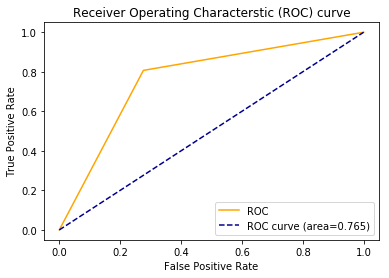

In [119]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% svc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Gradient Boosting classifier

Accuracy score using gradient boosting classifier model is 83.5239456754825
Cross validation score 80.23882573231162
-------------------------------
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1404
           1       0.82      0.86      0.84      1394

    accuracy                           0.84      2798
   macro avg       0.84      0.84      0.84      2798
weighted avg       0.84      0.84      0.84      2798

-------------------------------

 Confusion Matrix


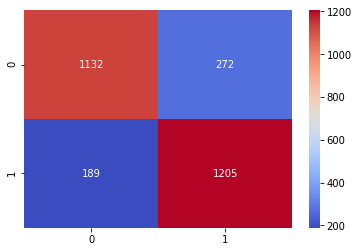

In [121]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_cv=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",gbc_cv*100)
print('-------------------------------')
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

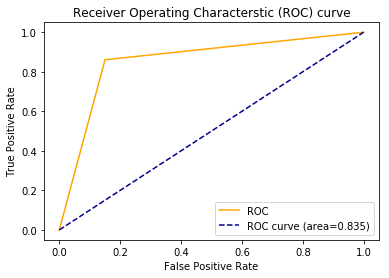

In [153]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% gbc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Storing the model scores in dataframe

In [150]:
model=['Logistic Regression','Decision Tree Classifier','GaussianNB Classifier','Random Forest Classifier',
       'Support Vector Classifier','Gradient boosting Classifier']

acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100,svc_acc*100,gbc_acc*100]

cv_score=[lr_cv*100,dtc_cv*100,gnb_cv*100,rfc_cv*100,CV2*100,gbc_cv*100]

result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'Cross Validation_score':cv_score})
result

,Model,Accuracy_score,Cross Validation_score
0,Logistic Regression,81.272337,80.616160
1,Decision Tree Classifier,80.021444,73.714780
2,GaussianNB Classifier,79.556826,75.900018
3,Random Forest Classifier,84.167262,78.163799
4,Support Vector Classifier,76.518942,80.128874
5,Gradient boosting Classifier,83.523946,80.238826


### Choosing the model

Choosing Random Forest Classifier as best model because it is giving best accuracy score of 85.20%.

### Applying hyperparameter to the best accuracy model

In [166]:
parameters = {
    "n_estimators" :[350,450,550], 
    "criterion": ["entropy","gini"],
    "max_depth" : [10,30],
    "min_samples_split":[2,4],
    "max_features":["sqrt","auto","log2"]}

In [167]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [168]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 30],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [350, 450, 550]})

In [169]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 350}

Accuracy of the model using Gradient boosting classifier is  85.20371694067191
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1404
           1       0.85      0.86      0.85      1394

    accuracy                           0.85      2798
   macro avg       0.85      0.85      0.85      2798
weighted avg       0.85      0.85      0.85      2798

-------------------------------

 Confusion Matrix


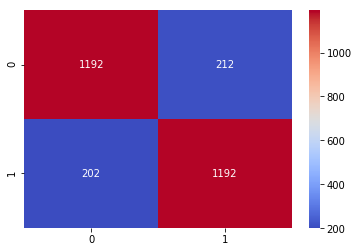

In [170]:
Final_model=RandomForestClassifier(n_estimators= 350,criterion='gini',min_samples_split=4,max_depth=30,
                                  random_state=42,max_features='auto')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Gradient boosting classifier is ",acc_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

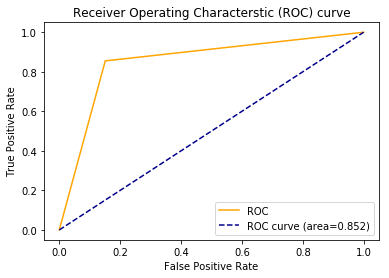

In [172]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### With hyperparameter tuning model accuracy has increased from 84.16 to 85.20 percent.

### Saving the model

In [173]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [174]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']